In [1]:
import pandas as pd
from astropy.coordinates import SkyCoord  # High-level coordinates
import matplotlib.pyplot as plt
import astropy.units as u
import numpy as np

In [2]:
# https://physics.mcmaster.ca/~harris/mwgc.dat
# https://arxiv.org/abs/1012.3224
df = pd.read_csv('mwgc_combined.csv')

In [3]:
df

,ID,Name,RA,DEC,L,B,R_Sun,R_gc,X,Y,...,v_LSR,sig_v,+/-.1,c,r_c,r_h,mu_V,rho_0,lg(tc),lg(th)
0,NGC 104,47 Tuc,00 24 05.67,-72 04 52.6,305.89,-44.89,4.5,7.4,1.9,-2.6,...,-26.7,11.0,0.3,2.07,0.36,3.17,14.38,4.88,7.84,9.55
1,NGC 288,NaN,00 52 45.24,-26 34 57.4,152.30,-89.38,8.9,12.0,-0.1,0.0,...,-51.9,2.9,0.3,0.99,1.35,2.23,20.05,1.78,8.99,9.32
2,NGC 362,NaN,01 03 14.26,-70 50 55.6,301.53,-46.25,8.6,9.4,3.1,-5.1,...,214.0,6.4,0.3,1.76,0.18,0.82,14.80,4.74,7.76,8.93
3,Whiting 1,NaN,02 02 57,-03 15 10,161.22,-60.76,30.1,34.5,-13.9,4.7,...,-138.1,NaN,NaN,0.55,0.25,0.22,NaN,NaN,NaN,7.93
4,NGC 1261,NaN,03 12 16.21,-55 12 58.4,270.54,-52.12,16.3,18.1,0.1,-10.0,...,54.9,NaN,NaN,1.16,0.35,0.68,17.73,2.99,8.59,9.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,NGC 7089,M 2,21 33 27.02,-00 49 23.7,53.37,-35.77,11.5,10.4,5.6,7.5,...,3.8,8.2,0.6,1.59,0.32,1.06,15.78,4.00,8.48,9.40
153,NGC 7099,M 30,21 40 22.12,-23 10 47.5,27.18,-46.84,8.1,7.1,4.9,2.5,...,-179.6,5.5,0.4,2.50,0.06,1.03,15.35,5.01,6.37,8.88
154,Pal 12,NaN,21 46 38.84,-21 15 09.4,30.51,-47.68,19.0,15.8,11.0,6.5,...,32.5,NaN,NaN,2.98,0.02,1.72,19.21,3.64,5.22,9.28
155,Pal 13,NaN,23 06 44.44,+12 46 19.2,87.10,-42.70,26.0,26.9,1.0,19.1,...,30.9,0.9,0.3,0.66,0.48,0.36,24.31,0.16,8.36,8.35


In [4]:
cc = SkyCoord(df['RA'].values, df['DEC'].values , unit=(u.hourangle, u.deg))


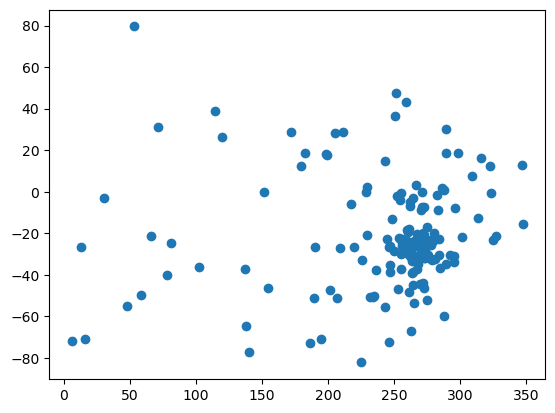

In [5]:
plt.figure()
plt.scatter(cc.ra, cc.dec)

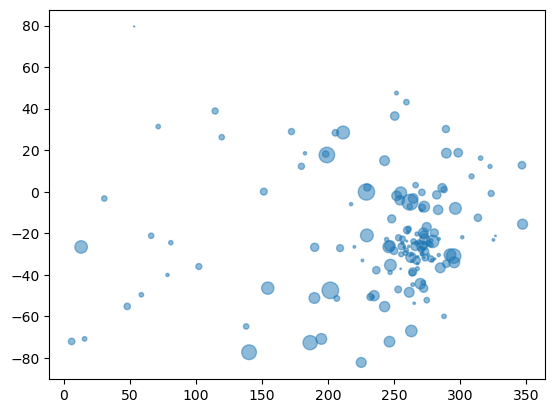

In [6]:
plt.figure()
plt.scatter(cc.ra, cc.dec, s=(df['r_c'].values*60), alpha=0.5)

In [7]:
ok = df['r_h'].values > 0
df['r_h'].values[ok] # half-light radius, in arcmin

array([3.17, 2.23, 0.82, 0.22, 0.68, 0.46, 0.41, 0.46, 0.5 , 0.51, 0.65,
       0.98, 0.89, 0.21, 0.8 , 2.1 , 0.65, 3.1 , 0.51, 0.26, 0.48, 3.91,
       1.05, 1.51, 2.41, 1.31, 2.61, 5.  , 2.31, 0.73, 0.43, 2.3 , 0.86,
       0.4 , 1.71, 0.45, 2.73, 2.06, 1.77, 1.1 , 0.89, 0.9 , 0.98, 1.2 ,
       1.22, 0.61, 4.33, 1.05, 1.63, 0.85, 1.25, 1.73, 0.5 , 1.69, 0.36,
       1.77, 0.34, 1.  , 1.95, 0.86, 1.1 , 0.92, 1.32, 0.66, 0.74, 0.89,
       1.42, 0.65, 1.02, 0.63, 0.96, 0.73, 0.81, 0.88, 2.05, 1.4 , 1.52,
       2.92, 1.85, 3.1 , 2.05, 0.74, 3.82, 1.3 , 0.52, 1.3 , 1.91, 2.9 ,
       1.2 , 0.92, 1.59, 0.72, 0.48, 0.57, 0.44, 0.44, 1.02, 0.78, 1.05,
       0.5 , 1.55, 1.  , 0.85, 0.38, 1.7 , 1.21, 1.06, 1.65, 1.05, 1.03,
       0.55, 2.15, 2.38, 0.75, 0.8 , 0.55, 0.73, 0.82, 1.97, 0.51, 0.84,
       0.73, 0.48, 3.36, 0.58, 0.71, 0.65, 1.33, 0.82, 0.68, 1.53, 1.1 ,
       1.91, 1.27, 1.1 , 0.77, 0.99, 1.77, 2.83, 0.95, 1.46, 1.67, 0.46,
       0.69, 0.93, 0.44, 1.  , 1.06, 1.03, 1.72, 0.

In [8]:
np.nansum((np.pi * ((df['r_h'].values/60.)**2))) # total half-light area, in degrees

0.30006808784361527

In [9]:
# THIS didn't work for Antares, b/c radius limit of 0.01 deg :(
# df_out = pd.DataFrame(data={'ra':cc.ra.deg[ok], 'dec':cc.dec.deg[ok], 
#                             'rad':df['r_h'].values[ok]/60.*2, 
#                             'name':df['ID'].values[ok]})
# df_out.to_csv('mwgc_antares.csv', index=False, header=None)

In [10]:
np.sum(ok)

152

In [11]:
df_out = pd.DataFrame(data={'ra':cc.ra.deg[ok], 'dec':cc.dec.deg[ok], 
                            'rad':np.ones(np.sum(ok))*0.01, 
                            'name':df['ID'].values[ok]})
df_out.to_csv('mwgc_antares_v2.csv', index=False, header=None)

# Local Volume
let's go outside the MW (and a few inside that we missed before)
* https://github.com/apace7/local_volume_database
* https://arxiv.org/abs/2411.07424v2

In [15]:
df1 = pd.read_csv('gc_ambiguous.csv')
df2 = pd.read_csv('gc_dwarf_hosted.csv')
df3 = pd.read_csv('gc_mw_new.csv')
df4 = pd.read_csv('gc_other.csv')

In [17]:
print(df1.shape, df2.shape, df3.shape, df4.shape)

(25, 120) (313, 120) (53, 120) (7, 120)


In [18]:
lvdb = pd.concat([df1, df2, df3, df4])

In [19]:
lvdb.shape

(398, 120)

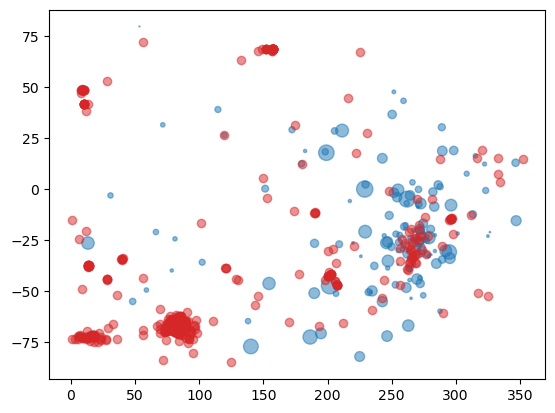

In [25]:
plt.figure()
plt.scatter(cc.ra, cc.dec, s=(df['r_c'].values*60), alpha=0.5)
plt.scatter(lvdb['ra'], lvdb['dec'],alpha=.5, c='C3')


In [27]:
lvdb['name']

0         Alice
1    Balbinot 1
2       BLISS 1
3       DELVE 1
4       DELVE 2
        ...    
2       UCD 320
3        LP 866
4         EXT 8
5       UCD 330
6        Gaia 9
Name: name, Length: 398, dtype: object

In [28]:
df_out2 = pd.DataFrame(data={'ra':lvdb['ra'].values, 
                             'dec':lvdb['dec'].values, 
                            'rad':np.ones(len(lvdb))*0.01, 
                            'name':lvdb['name'].values})
df_out2.to_csv('lvdb_antares.csv', index=False, header=None)